In [62]:
import numpy as np                                                              # Laden aller Bibliotheken
import os
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
tex = '/content/charging_data.csv'
import seaborn as sns
from datetime import datetime

In [67]:
# Laden des Datensatzes in Variable ds
ds = pd.read_csv(tex)

# Entfernen der unnötigen Spalten
ds_clean = ds.drop(columns=['adresszusatz','postleitzahl','betreiber','art_der_ladeeinrichung','anzahl_ladepunkte','anschlussleistung','steckertypen1','steckertypen2','steckertypen3','steckertypen4',
                            'p1_kw','p2_kw','p3_kw','p4_kw','kreis_kreisfreie_stadt','ort','strasse','hausnummer','breitengrad','laengengrad;;'])

# Entfernen alle Zeilen mit fehlenden Werten
ds_clean = ds_clean.dropna()

# Konvertieren der Spalte 'inbetriebnahmedatum' in das Datetime-Format
ds_clean['inbetriebnahmedatum'] = pd.to_datetime(ds_clean['inbetriebnahmedatum'], errors='coerce')

# Erstellen einer neuen Spalte mit dem Jahr
ds_clean['jahr'] = ds_clean['inbetriebnahmedatum'].dt.year

# Erstellen einer neuen Spalte mit dem Monat
ds_clean['monat'] = ds_clean['inbetriebnahmedatum'].dt.month

# Erstellen einer neuen Spalte mit der Kalenderwoche
ds_clean['kalenderwoche'] = ds_clean['inbetriebnahmedatum'].dt.isocalendar().week

<ipython-input-67-930e4a0eadd2>:2: DtypeWarning: Columns (4,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(tex)


In [64]:
# Filtere der Spalte jahr
ds_clean = ds_clean[ds_clean['jahr'] <= 2022]
ds_clean = ds_clean[ds_clean['jahr'] >= 2010]

# Sortiere den DataFrame nach 'inbetriebnahmedatum'
ds_clean = ds_clean.sort_values(by='inbetriebnahmedatum')

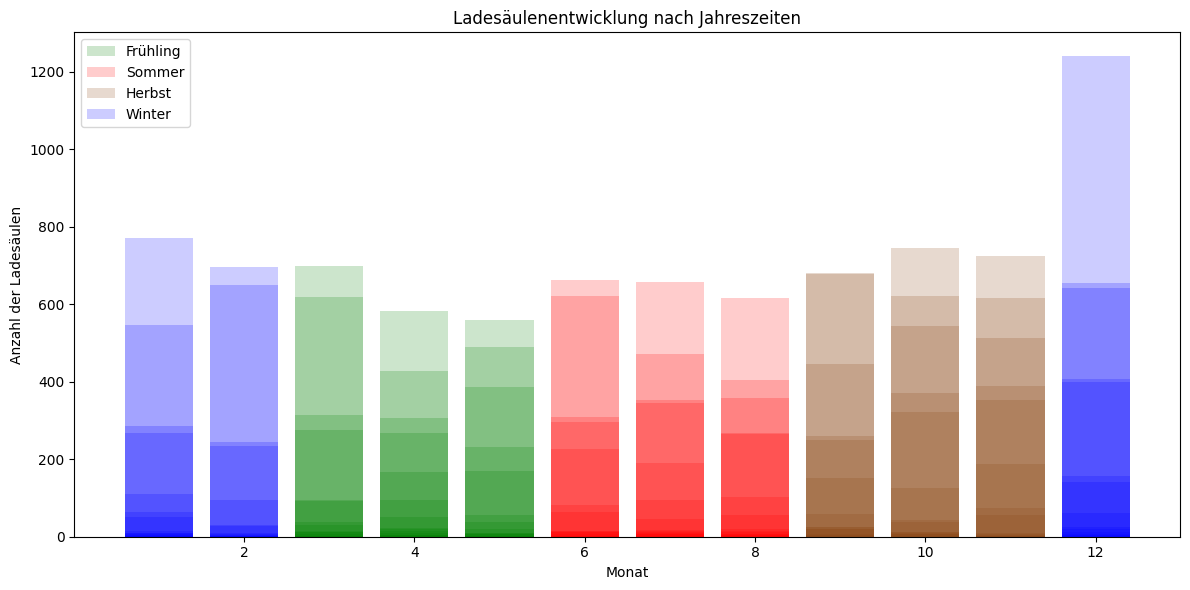

In [66]:
# Alle relevanten Daten in data laden
data = {
    'inbetriebnahmedatum': ds_clean['inbetriebnahmedatum'],
    'monat': ds_clean['monat'],
    'jahr': ds_clean['jahr']
}

# jeweiligen Jahreszeiten eine Farbe zuordnen, grau als Default Wert
def get_color(jahreszeit):
    color_mapping = {'Frühling': 'green', 'Sommer': 'red', 'Herbst': 'saddlebrown', 'Winter': 'blue'}

    return color_mapping.get(jahreszeit, 'gray')

# Funktion um Jahreszeit zu bestimmen
# Definieren der Jahreszeiten
def jahreszeit_bestimmen(datum):
    fruehling_beginn = datetime.strptime("01-03", "%d-%m").replace(year=datum.year)
    fruehling_ende = datetime.strptime("31-05", "%d-%m").replace(year=datum.year)

    sommer_beginn = datetime.strptime("01-06", "%d-%m").replace(year=datum.year)
    sommer_ende = datetime.strptime("31-08", "%d-%m").replace(year=datum.year)

    herbst_beginn = datetime.strptime("01-09", "%d-%m").replace(year=datum.year)
    herbst_ende = datetime.strptime("30-11", "%d-%m").replace(year=datum.year)

    winter_beginn = datetime.strptime("01-12", "%d-%m").replace(year=datum.year)
    winter_ende = datetime.strptime("28-02", "%d-%m").replace(year=datum.year)
# Zuordnen der Jahreszeiten
    if fruehling_beginn <= datum <= fruehling_ende:
        return "Frühling"
    elif sommer_beginn <= datum <= sommer_ende:
        return "Sommer"
    elif herbst_beginn <= datum <= herbst_ende:
        return "Herbst"
    else:
        return "Winter"


# Jahreszeit_bestimmen auf die Spalte "inbetriebnahmedatum"
ds_clean['Jahreszeit'] = ds_clean['inbetriebnahmedatum'].apply(jahreszeit_bestimmen)

# Datenexploration der Splate Jahreszeit
ds_clean_expanded = ds_clean.explode('Jahreszeit')

# Gruppieren nach Jahr, Monat und Jahreszeit und berechnen der Summe der Anzahl der Ladesäulen
grouped_data = ds_clean_expanded.groupby(['jahr', 'monat', 'Jahreszeit']).size().reset_index(name='Anzahl')

# Sortieren der Jahreszeiten
sorted_seasons = ['Frühling', 'Sommer', 'Herbst', 'Winter']
grouped_data['Jahreszeit'] = pd.Categorical(grouped_data['Jahreszeit'], categories=sorted_seasons, ordered=True)
grouped_data = grouped_data.sort_values(by=['Jahreszeit'])

# Erstellen des Balkendiagrammes
plt.figure(figsize=(12, 6))

for jahreszeit in sorted_seasons:
 # Erstelle eine Teilmenge (subset) des DataFrames für die aktuelle Jahreszeit
    subset = grouped_data[grouped_data['Jahreszeit'] == jahreszeit]
 # Erstelle ein Balkendiagramm für die Anzahl der Ladesäulen nach Monat und aktueller Jahreszeit
    plt.bar(subset['monat'], subset['Anzahl'], color=get_color(jahreszeit), label=jahreszeit, alpha= 0.2)

#Beschriftung des Diagrammes
plt.xlabel('Monat')
plt.ylabel('Anzahl der Ladesäulen')
plt.title('Ladesäulenentwicklung nach Jahreszeiten')
plt.legend()
plt.tight_layout()
plt.show()